# CE2101/CZ2101 ALGORITHM DESIGN AND ANALYSIS
# Project 1: Integration of Mergesort & Insertion Sort

In [1]:
import random
from time import process_time
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

pd.set_option('display.max_rows', None)

### (a) Algorithm implementation: Implement the above hybrid algorithm.

In [2]:
#################### MERGESORT & INSERTION SORT ####################
#### input: array, threshold integer | output: key comparisons
def insertMergeSort(arr, S):
    keyComp = 0 
    # Merge Sort
    if len(arr) > S:
        mid = len(arr) // 2  # floor division
        
        left = arr[:mid] # new subarrays left and right
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = a = b = 0

        while a < len(left) and b < len(right):
            keyComp += 1
            # Case 1: left element is bigger
            if left[a] < right[b]:
                arr[index] = left[a]  # write into arr (sorted array)
                a += 1
                # "remove" the element from left sublist
                
            # Case 2: right element is bigger
            elif left[a] > right[b]:
                arr[index] = right[b]  # write into arr (sorted array)
                b += 1
                # "remove" the element from right sublist
                
            # Case 3: both elements have the same key value
            else:
                arr[index] = left[a]
                a += 1
                index += 1
                arr[index] = right[b]
                b += 1
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while a < len(left):
            arr[index] = left[a]
            a += 1
            index += 1
        while b < len(right):
            arr[index] = right[b]
            b += 1
            index += 1
            
    # Insertion Sort
    else:
        for i in range(1, len(arr)):
            for j in range(i, 0, -1):
                keyComp += 1
                if arr[j] < arr[j - 1]:
                    arr[j], arr[j - 1] = arr[j - 1], arr[j]
                else:
                    break

    return keyComp  # report key comparisons
####################################################################

### (b) Generate input data: Generate arrays of increasing sizes, in a range from 1,000 to 10 million.

In [3]:
######################## INPUT GENERATOR ########################
### input: array size, largest integer allowed | output: array
def inputGen(sizeArr, x):
    returnList = []
    for i in range(0, sizeArr):
        n = random.randint(1, x)
        returnList.append(n)
    return returnList
################################################################

### Helper Functions

In [4]:
##################### printList #####################
### input: array | output: N/A (print to console)
def printList(arr):
    for i in range(len(arr)):
        print(arr[i], end=" ")
    print()
####################################################

In [34]:
##################### plotGraphFromDF #####################
### input: dataframe with two columns, X and Y | output: N/A (pop-up window with plot)
def plotGraphFromDF(df):
    plt.plot(df[df.columns[0]], df[df.columns[1]])
    plt.title(df.columns[1] + ' against ' + df.columns[0])
    plt.ylabel(df.columns[1])
    plt.xlabel(df.columns[0])
    plt.yscale('linear')
    plt.xscale('linear')

plt.show()
####################################################

### (c) Analyze time complexity

#### Cursory note 1: Deciding on the value of x (the largest number of the array)

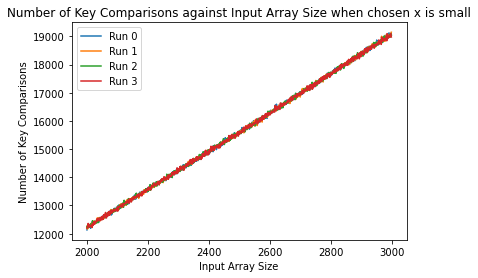

In [35]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=5
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is small")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.yscale('linear')
plt.xscale('linear')
plt.show()

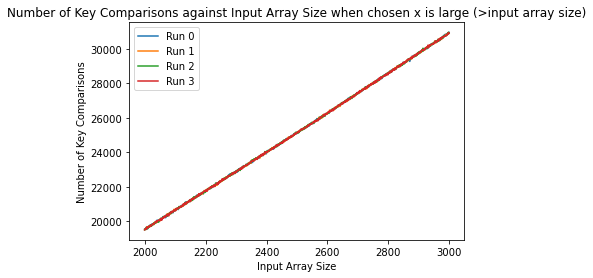

In [36]:
S = 4
keyCompArr = []
keyCompArrOfArr = []
df = pd.DataFrame(size for size in range(2000,3000))
df.columns = ['Size of Array']
loops = 4

x=1000000
for loop in range(loops):
    keyCompArr = []
    for i in df['Size of Array']:
        arr = inputGen(i, x)
        keyCompArr.append(insertMergeSort(arr, S))
    plt.plot(df['Size of Array'], keyCompArr, label = "Run " + str(loop))
    
plt.legend()
plt.title("Number of Key Comparisons against Input Array Size when chosen x is large (>input array size)")
plt.ylabel("Number of Key Comparisons")
plt.xlabel("Input Array Size")
plt.yscale('linear')
plt.xscale('linear')
plt.show()

As seen from comparing the two graphs, the variability of the number of key comparisons is greater when x is small. This is because, with small x, there is a higher probability of having duplicate keys in the array, resulting in less key comparisons when sorting.

**Hence, there is a need to select a sufficiently high value of x to minimise duplicate keys and hence reduce the variance in key comparisons**

Formally, if x is less than the array size, there will definitely be duplicate keys (pigeonhole principle), although the inverse is not true (we can still have duplicate keys with high x by the nature of random number generator)

### i. With the value of S fixed, plot the number of key comparisons over different sizes of the input list n.

In [45]:
S = 4
df = pd.DataFrame(columns = ['sizeArr', 'keyCompArr']) # Create empty dataframe

for i in range(3,7,1):
    for j in range(1, 11, 2):
        arr = inputGen(j * pow(10,i), pow(10,7)) # for 1*1000, 3*1000, ..., 11*1000, 1*10000, 3*10000, ...
        keyComp = insertMergeSort(arr, S)
    
        df = df.append({'sizeArr' : j * pow(10,i), 'keyCompArr' : keyComp}, 
                ignore_index = True) # Append row
df

sizeArr keyCompArr
0      1000       8780
1      3000      30936
2      5000      55213
3      7000      80933
4      9000     107213
5     10000     120505
6     30000     410009
7     50000     718328
8     70000    1041719
9     90000    1368689
10   100000    1536319
11   300000    5087382
12   500000    8851572
13   700000   12699565
14   900000   16666722
15  1000000   18679730
16  3000000   60411488
17  5000000  104033731
18  7000000  148632077
19  9000000  193876425

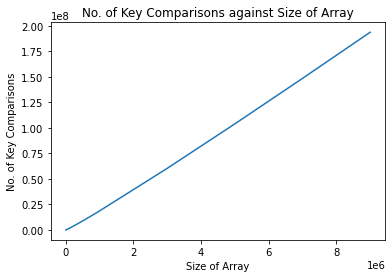

In [46]:
plotGraphFromDF(
    pd.DataFrame(
        {
            'Size of Array'          : df['sizeArr'],
            'No. of Key Comparisons' : df['keyCompArr']
        }
    )
)

### ii. With the input size n fixed, plot the number of key comparisons over different values of S. Compare your empirical results with your theoretical analysis of the time complexity.

Let n = 10,000 for the sake of this comparison. Since S supposed to be a small integer, test S = 1 to S = 32.

In [39]:
df2 = pd.DataFrame(columns = ['S', 'keyCompArr']) # Create empty dataframe
arr2 = inputGen(pow(10,4), pow(10,4)) # Test on the same array
    
for i in range(1,32,1):
    tempArr = arr2.copy()
    keyComp = insertMergeSort(tempArr, i)
    df2 = df2.append({'S' : i, 'keyCompArr' : keyComp}, 
                ignore_index = True) # Append row
    
df2

S keyCompArr
0    1     116740
1    2     116740
2    3     116719
3    4     116780
4    5     117786
5    6     117786
6    7     117786
7    8     117786
8    9     118815
9   10     123349
10  11     123349
11  12     123349
12  13     123349
13  14     123349
14  15     123349
15  16     123349
16  17     123349
17  18     123349
18  19     130739

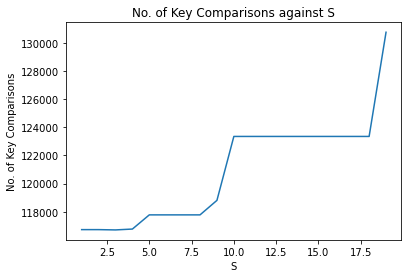

In [40]:
plotGraphFromDF(
    pd.DataFrame(
        {
            'S'                      : df2['S'],
            'No. of Key Comparisons' : df2['keyCompArr']
        }
    )
)

### iii. Using different sizes of input datasets, study how to determine an optimal value of S for the best performance of this hybrid algorithm.

In [48]:
df3 = pd.DataFrame(columns = ['Input Size', 'S', 'Key Comparisons', 'CPU Time']) # Create empty dataframe
   
for inputSize in [1000, 2000, 4000, 8000, 16000, 32000, 64000, 128000, 256000, 512000, 1024000, 2048000, 4096000, 10000000]:
    for S in range(1,32,1):
        t1_start = process_time()  # For insertMergeSort
        keyComp = insertMergeSort(inputGen(inputSize, pow(10,4)), S)
        t1_stop = process_time()
        df3 = df3.append({'Input Size' : inputSize, 'S' : S, 'Key Comparisons' : keyComp, 'CPU Time' : t1_stop - t1_start}, 
                ignore_index = True) # Append row
    
df3

Input Size     S  Key Comparisons    CPU Time
0        1000.0   1.0           8640.0    0.000000
1        1000.0   2.0           8643.0    0.000000
2        1000.0   3.0           8645.0    0.000000
3        1000.0   4.0           8741.0    0.000000
4        1000.0   5.0           8722.0    0.015625
5        1000.0   6.0           8725.0    0.000000
6        1000.0   7.0           8764.0    0.000000
7        1000.0   8.0           9024.0    0.015625
8        1000.0   9.0           9039.0    0.000000
9        1000.0  10.0           9093.0    0.000000
10       1000.0  11.0           9037.0    0.015625
11       1000.0  12.0           9044.0    0.000000
12       1000.0  13.0           9082.0    0.000000
13       1000.0  14.0           9074.0    0.015625
14       1000.0  15.0           9434.0    0.000000
15       1000.0  16.0          10399.0    0.000000
16       1000.0  17.0          10269.0    0.015625
17       1000.0  18.0          10082.0    0.000000
18       1000.0  19.0          10177.0    0.000000
19       1000.0  20.0          10275.0    0.015625
20       1000.0  21.0          10359.0    0.000000
21       1000.0  22.0          10302.0    0.000000
22       1000.0  23.0          10419.0    0.015625
23       1000.0  24.0          10434.0    0.000000
24       1000.0  25.0          10289.0    0.000000
25       1000.0  26.0          10336.0    0.015625
26       1000.0  27.0          10285.0    0.000000
27       1000.0  28.0          10284.0    0.000000
28       1000.0  29.0          10329.0    0.000000
29       1000.0  30.0          10211.0    0.000000
30       1000.0  31.0          12627.0    0.015625
31       2000.0   1.0          19252.0    0.000000
32       2000.0   2.0          19253.0    0.015625
33       2000.0   3.0          19248.0    0.015625
34       2000.0   4.0          19298.0    0.015625
35       2000.0   5.0          19358.0    0.000000
36       2000.0   6.0          19360.0    0.015625
37       2000.0   7.0          19401.0    0.015625
38       2000.0   8.0          20081.0    0.000000
39       2000.0   9.0          20089.0    0.015625
40       2000.0  10.0          20030.0    0.015625
41       2000.0  11.0          20034.0    0.000000
42       2000.0  12.0          20043.0    0.015625
43       2000.0  13.0          20048.0    0.015625
44       2000.0  14.0          20067.0    0.000000
45       2000.0  15.0          20875.0    0.015625
46       2000.0  16.0          22442.0    0.000000
47       2000.0  17.0          22273.0    0.000000
48       2000.0  18.0          22375.0    0.015625
49       2000.0  19.0          22514.0    0.000000
50       2000.0  20.0          22557.0    0.015625
51       2000.0  21.0          22512.0    0.015625
52       2000.0  22.0          22525.0    0.000000
53       2000.0  23.0          22576.0    0.015625
54       2000.0  24.0          22630.0    0.015625
55       2000.0  25.0          22500.0    0.000000
56       2000.0  26.0          22499.0    0.015625
57       2000.0  27.0          22532.0    0.015625
58       2000.0  28.0          22497.0    0.000000
59       2000.0  29.0          22721.0    0.015625
60       2000.0  30.0          22386.0    0.015625
61       2000.0  31.0          26929.0    0.015625
62       4000.0   1.0          42112.0    0.015625
63       4000.0   2.0          42119.0    0.031250
64       4000.0   3.0          42118.0    0.015625
65       4000.0   4.0          42340.0    0.015625
66       4000.0   5.0          42314.0    0.015625
67       4000.0   6.0          42345.0    0.031250
68       4000.0   7.0          42514.0    0.015625
69       4000.0   8.0          43757.0    0.031250
70       4000.0   9.0          43743.0    0.015625
71       4000.0  10.0          43801.0    0.015625
72       4000.0  11.0          43565.0    0.031250
73       4000.0  12.0          43841.0    0.015625
74       4000.0  13.0          43711.0    0.015625
75       4000.0  14.0          43808.0    0.015625
76       4000.0  15.0          45439.0    0.015625
77       4000.0  16.0      

In [11]:
df3 = pd.read_excel('df3.xlsx')
df3

Input Size   S  Key Comparisons    CPU Time
0          1000   1             8640    0.000000
1          1000   2             8643    0.000000
2          1000   3             8645    0.000000
3          1000   4             8741    0.000000
4          1000   5             8722    0.015625
5          1000   6             8725    0.000000
6          1000   7             8764    0.000000
7          1000   8             9024    0.015625
8          1000   9             9039    0.000000
9          1000  10             9093    0.000000
10         1000  11             9037    0.015625
11         1000  12             9044    0.000000
12         1000  13             9082    0.000000
13         1000  14             9074    0.015625
14         1000  15             9434    0.000000
15         1000  16            10399    0.000000
16         1000  17            10269    0.015625
17         1000  18            10082    0.000000
18         1000  19            10177    0.000000
19         1000  20            10275    0.015625
20         1000  21            10359    0.000000
21         1000  22            10302    0.000000
22         1000  23            10419    0.015625
23         1000  24            10434    0.000000
24         1000  25            10289    0.000000
25         1000  26            10336    0.015625
26         1000  27            10285    0.000000
27         1000  28            10284    0.000000
28         1000  29            10329    0.000000
29         1000  30            10211    0.000000
30         1000  31            12627    0.015625
31         2000   1            19252    0.000000
32         2000   2            19253    0.015625
33         2000   3            19248    0.015625
34         2000   4            19298    0.015625
35         2000   5            19358    0.000000
36         2000   6            19360    0.015625
37         2000   7            19401    0.015625
38         2000   8            20081    0.000000
39         2000   9            20089    0.015625
40         2000  10            20030    0.015625
41         2000  11            20034    0.000000
42         2000  12            20043    0.015625
43         2000  13            20048    0.015625
44         2000  14            20067    0.000000
45         2000  15            20875    0.015625
46         2000  16            22442    0.000000
47         2000  17            22273    0.000000
48         2000  18            22375    0.015625
49         2000  19            22514    0.000000
50         2000  20            22557    0.015625
51         2000  21            22512    0.015625
52         2000  22            22525    0.000000
53         2000  23            22576    0.015625
54         2000  24            22630    0.015625
55         2000  25            22500    0.000000
56         2000  26            22499    0.015625
57         2000  27            22532    0.015625
58         2000  28            22497    0.000000
59         2000  29            22721    0.015625
60         2000  30            22386    0.015625
61         2000  31            26929    0.015625
62         4000   1            42112    0.015625
63         4000   2            42119    0.031250
64         4000   3            42118    0.015625
65         4000   4            42340    0.015625
66         4000   5            42314    0.015625
67         4000   6            42345    0.031250
68         4000   7            42514    0.015625
69         4000   8            43757    0.031250
70         4000   9            43743    0.015625
71         4000  10            43801    0.015625
72         4000  11            43565    0.031250
73         4000  12            43841    0.015625
74         4000  13            43711    0.015625
75         4000  14            43808    0.015625
76         4000  15            45439    0.015625
77         4000  16            48573    0.015625
78         4000  17            48639    0.031250
79         4000  18            48522    0.015625
80         4000  19            48394

In [13]:
KeyComps = df3.pivot(index='Input Size', columns='S', values='Key Comparisons')
KeyComps

S                  1          2          3          4          5          6   \
Input Size                                                                     
1000             8640       8643       8645       8741       8722       8725   
2000            19252      19253      19248      19298      19358      19360   
4000            42112      42119      42118      42340      42314      42345   
8000            91015      90979      91126      91574      91531      91471   
16000          194733     194843     194790     195388     195712     195694   
32000          412498     412391     412250     414135     414448     414332   
64000          866839     866642     866876     870142     870594     870722   
128000        1811185    1811468    1811653    1819361    1819076    1818979   
256000        3771086    3771694    3771381    3786054    3785713    3786538   
512000        7826783    7826294    7826303    7856489    7856393    7856991   
1024000      16206915   16207461   16205618   16266343   16265746   16265538   
2048000      33494035   33491478   33493372   33611231   33614426   33609656   
4096000      69119628   69116254   69114452   69354874   69355263   69352284   
10000000    175523344  175522894  175521172  175650443  176535671  176524063   

S                  7          8          9          10  ...         22  \
Input Size                                              ...              
1000             8764       9024       9039       9093  ...      10302   
2000            19401      20081      20089      20030  ...      22525   
4000            42514      43757      43743      43801  ...      48904   
8000            91935      94403      94337      94409  ...     103561   
16000          196774     201456     201780     201506  ...     220231   
32000          415718     426054     425932     425605  ...     464719   
64000          873075     893593     894629     894125  ...     970004   
128000        1824701    1866147    1865380    1865695  ...    2018253   
256000        3797701    3878241    3878263    3878186  ...    4184302   
512000        7880762    8043135    8043395    8044398  ...    8656491   
1024000      16311552   16637805   16637675   16635949  ...   17860885   
2048000      33705201   34357741   34353687   34357049  ...   36803959   
4096000      69543672   70838920   70842170   70841583  ...   75739879   
10000000    176534095  176530077  178571389  181842946  ...  197737803   

S                  23         24         25         26         27         28  \
Input Size                                                                     
1000            10419      10434      10289      10336      10285      10284   
2000            22576      22630      22500      22499      22532      22497   
4000            48284      48513      48532      48402      48559      48492   
8000           103747     104057     104009     104081     104332     103928   
16000          220614     221077     220655     220874     220579     220365   
32000          463565     463650     464355     465074     463866     464965   
64000          970412     970674     969327     969415     971025     971514   
128000        2018449    2017930    2019654    2019186    2019427    2019066   
256000        4185643    4185720    4186104    4187002    4187344    4186559   
512000        8652151    8657421    8654222    8655662    8656210    8659842   
1024000      17863345   17865407   17863981   17862015   17861369   17861903   
2048000      36802547   36799386   36806106   36802391   36797673   36806683   
4096000      75740585   75735062   75747854   75739727   75738499   75732364   
10000000    197728928  197741155  197743330  197733668  197754337  197736658   

S                  29         30         31  
Input Size                                   
1000            10329      10211      12627  
2000            22721      22386      26929  
4000            48576      48689      57438  
8000           103632  

<AxesSubplot:xlabel='Input Size'>

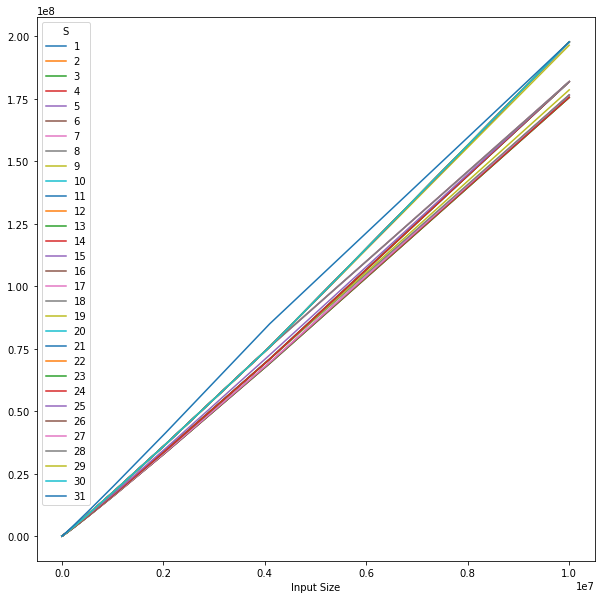

In [14]:
KeyComps.plot(figsize=(10,10))

In [15]:
CPUTime = df3.pivot(index='Input Size', columns='S', values='CPU Time')
CPUTime

S                   1           2           3           4           5   \
Input Size                                                               
1000          0.000000    0.000000    0.000000    0.000000    0.015625   
2000          0.000000    0.015625    0.015625    0.015625    0.000000   
4000          0.015625    0.031250    0.015625    0.015625    0.015625   
8000          0.046875    0.062500    0.046875    0.031250    0.031250   
16000         0.109375    0.093750    0.093750    0.093750    0.093750   
32000         0.234375    0.203125    0.203125    0.218750    0.187500   
64000         0.484375    0.437500    0.437500    0.421875    0.421875   
128000        0.984375    1.140625    1.171875    1.218750    1.140625   
256000        2.281250    2.078125    2.015625    2.250000    2.156250   
512000        4.515625    4.203125    4.359375    4.031250    4.031250   
1024000       9.640625    9.078125    8.953125    8.671875    9.093750   
2048000      23.281250   21.562500   19.656250   21.609375   22.015625   
4096000      42.703125   39.281250   39.906250   39.375000   40.781250   
10000000    108.312500  101.984375  103.687500  105.234375  103.109375   

S                   6           7          8          9          10  ...  \
Input Size                                                           ...   
1000          0.000000    0.000000   0.015625   0.000000   0.000000  ...   
2000          0.015625    0.015625   0.000000   0.015625   0.015625  ...   
4000          0.031250    0.015625   0.031250   0.015625   0.015625  ...   
8000          0.046875    0.046875   0.046875   0.046875   0.046875  ...   
16000         0.109375    0.093750   0.078125   0.093750   0.078125  ...   
32000         0.203125    0.187500   0.171875   0.187500   0.203125  ...   
64000         0.406250    0.406250   0.375000   0.390625   0.390625  ...   
128000        1.062500    1.093750   0.937500   0.906250   0.968750  ...   
256000        2.046875    2.015625   1.921875   1.968750   1.859375  ...   
512000        4.093750    4.078125   3.937500   3.937500   4.015625  ...   
1024000      10.109375    9.343750   8.859375  10.218750   9.515625  ...   
2048000      19.031250   18.562500  18.171875  17.734375  18.046875  ...   
4096000      39.421875   41.062500  38.921875  38.265625  38.015625  ...   
10000000    102.437500  102.234375  99.281250  91.078125  91.781250  ...   

S                  22          23         24         25         26         27  \
Input Size                                                                      
1000         0.000000    0.015625   0.000000   0.000000   0.015625   0.000000   
2000         0.000000    0.015625   0.015625   0.000000   0.015625   0.015625   
4000         0.031250    0.015625   0.031250   0.015625   0.015625   0.031250   
8000         0.046875    0.046875   0.062500   0.046875   0.046875   0.046875   
16000        0.093750    0.093750   0.093750   0.093750   0.093750   0.078125   
32000        0.187500    0.203125   0.187500   0.203125   0.187500   0.203125   
64000        0.421875    0.406250   0.421875   0.406250   0.453125   0.406250   
128000       1.203125    1.312500   1.109375   1.031250   1.000000   0.890625   
256000       1.921875    1.906250   1.921875   1.906250   1.984375   1.906250   
512000       4.031250    3.921875   3.984375   3.953125   3.968750   3.953125   
1024000      8.468750    8.390625   8.765625   9.500000   9.812500   9.234375   
2048000     18.265625   18.828125  18.437500  18.250000  18.375000  18.531250   
4096000     37.187500   37.046875  37.281250  37.015625  37.484375  38.703125   
10000000    96.093750  100.359375  97.718750  98.656250  98.000000  98.125000   

S                  28          29         30         31  
Input Size                                               
1000         0.000000    0.000000   0.000000   0.015625  
2000         0.000000    0.015625   0.015625   0.015625  
4000         0.015625    0.015625   0.031250   0.015625  
8000       

<AxesSubplot:xlabel='Input Size'>

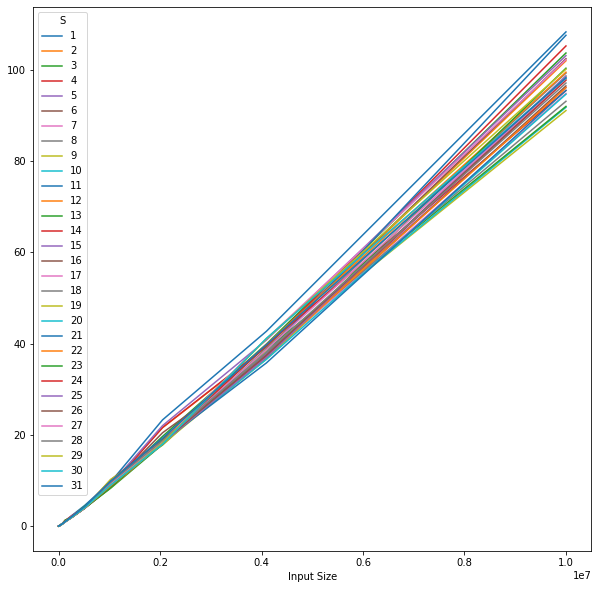

In [16]:
CPUTime.plot(figsize=(10,10))

#### Difference is most pronounced at high input sizes, so let's first examine that

In [17]:
pd.DataFrame(CPUTime.iloc[-1]).sort_values(by=pd.DataFrame(CPUTime.iloc[-1]).columns[0])

10000000
S             
9    91.078125
10   91.781250
13   91.984375
18   93.109375
20   94.656250
17   94.812500
21   95.484375
14   95.484375
22   96.093750
15   96.109375
16   96.468750
28   97.109375
24   97.718750
26   98.000000
27   98.125000
30   98.171875
31   98.265625
19   98.593750
25   98.656250
8    99.281250
12   99.484375
29  100.140625
23  100.359375
2   101.984375
7   102.234375
6   102.437500
5   103.109375
3   103.687500
4   105.234375
11  107.578125
1   108.312500

In [18]:
pd.DataFrame(KeyComps.iloc[-1]).sort_values(by=pd.DataFrame(KeyComps.iloc[-1]).columns[0])

10000000
S            
3   175521172
2   175522894
1   175523344
4   175650443
6   176524063
8   176530077
7   176534095
5   176535671
9   178571389
11  181823915
13  181830521
18  181832411
16  181833533
12  181838423
10  181842946
14  181842967
17  181843355
15  181849894
19  196437298
23  197728928
30  197730496
26  197733668
28  197736658
22  197737803
24  197741155
25  197743330
31  197750074
27  197754337
29  197755102
20  197755410
21  197764313

S = 3 by key comparisons, S = 9 by CPU time

#### Can we find a consensus value?

In [47]:
cputimeBestS = pd.DataFrame(columns = ['Input Size', 'Best S']) # Create empty dataframe

for i in range(len(CPUTime)):
    cputimeBestS = cputimeBestS.append({'Input Size' : CPUTime.iloc[i].name, 'Best S' : CPUTime.iloc[i].sort_values().index[0]}, 
                ignore_index = True) # Append row
    
cputimeBestS

Input Size Best S
0        1000      1
1        2000      1
2        4000      1
3        8000     13
4       16000     27
5       32000      8
6       64000      8
7      128000     27
8      256000     14
9      512000     14
10    1024000     13
11    2048000      9
12    4096000     21
13   10000000      9

In [49]:
keycompBestS = pd.DataFrame(columns = ['Input Size', 'Best S']) # Create empty dataframe

for i in range(len(KeyComps)):
    keycompBestS = keycompBestS.append({'Input Size' : KeyComps.iloc[i].name, 'Best S' : KeyComps.iloc[i].sort_values().index[0]}, 
                ignore_index = True) # Append row

keycompBestS

Input Size Best S
0        1000      1
1        2000      3
2        4000      1
3        8000      2
4       16000      1
5       32000      3
6       64000      2
7      128000      1
8      256000      1
9      512000      2
10    1024000      3
11    2048000      2
12    4096000      3
13   10000000      3

### d) Compare with original Mergesort: Implement the original version of Mergesort (as learnt in lecture). Compare its performance against the above hybrid algorithm in terms of the number of key comparisons and CPU times on the dataset with 10 million integers. You can use the optimal value of S obtained in (c) for this task.

In [13]:
#################### MERGESORT ####################
#### input: array, threshold integer | output: key comparisons
def mergeSort(arr, S):
    keyComp = 0
    if len(arr) > 1:
        mid = len(arr) // 2  # floor division

        left = arr[:mid]
        right = arr[mid:]
        keyComp += insertMergeSort(left, S)
        keyComp += insertMergeSort(right, S)

        # merge
        # index to keep track of arr
        index = a = b = 0

        while a < len(left) and b < len(right):
            keyComp += 1
            if left[a] < right[b]:
                arr[index] = left[a]  # write into arr (sorted array)
                a += 1
                # "remove" the element from left sublist
            elif left[a] > right[b]:
                arr[index] = right[b]  # write into arr (sorted array)
                b += 1
                # "remove" the element from right sublist
            else:
                arr[index] = left[a]
                a += 1
                index += 1
                arr[index] = right[b]
                b += 1
            index += 1

        # Check for remaining elements
        # Only one of these loops will run
        while a < len(left):
            arr[index] = left[a]
            a += 1
            index += 1
        while b < len(right):
            arr[index] = right[b]
            b += 1
            index += 1

    return keyComp  # report key comparisons
####################################################################

In [14]:
S = 4 # input optimal S here
arr3 = inputGen(pow(10,7), pow(10,7)) # array of 10 million integers
arr4 = arr3.copy()

t1_start = process_time()  # For insertMergeSort
kc1 = insertMergeSort(arr3, S)
t1_stop = process_time()  

t2_start = process_time()  # For insertMergeSort
kc2 = mergeSort(arr4, S)
t2_stop = process_time()  

Done


**Hybrid Insertion-Mergesort:**

In [15]:
print("No. of key comparisons: ", kc1, end="\n")
print("Elapsed time during the whole program in seconds:",t1_stop - t1_start)  

No. of key comparisons:  216443264
Elapsed time during the whole program in seconds: 98.20883799999956


**Classic Mergesort:**

In [16]:
print("No. of key comparisons: ", kc2, end="\n")
print("Elapsed time during the whole program in seconds:",t2_stop - t2_start) 

No. of key comparisons:  216443264
Elapsed time during the whole program in seconds: 96.75649599999997
